## Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

## Content
The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 
1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )

## Acknowledgements
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset is owned by Mohan S Acharya.

## Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

## Citation
Please cite the following if you are interested in using the dataset : Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

In [204]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [205]:
df = pd.read_csv('Admission_Predict.csv')
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [206]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


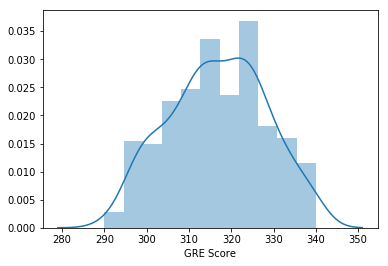

In [208]:
sns.distplot(df['GRE Score'])

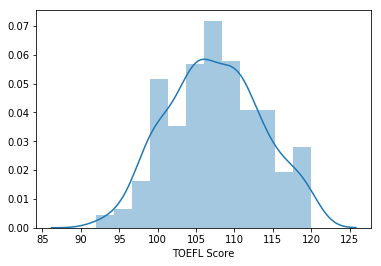

In [209]:
sns.distplot(df['TOEFL Score'])

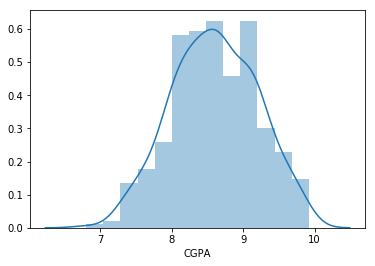

In [210]:
sns.distplot(df['CGPA'])

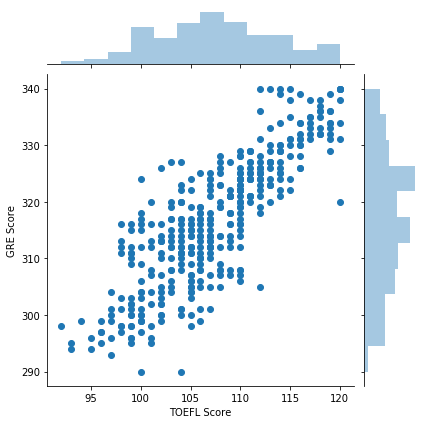

In [211]:
sns.jointplot(x='TOEFL Score',y='GRE Score',data=df,kind='scatter')

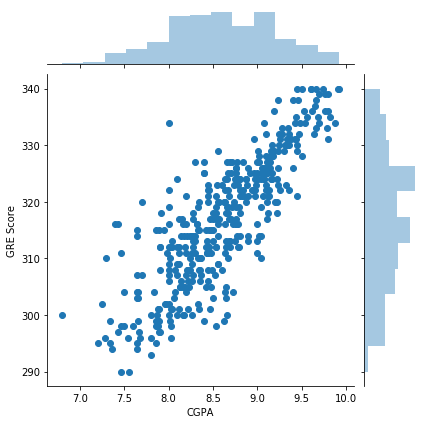

In [212]:
sns.jointplot(x='CGPA',y='GRE Score',data=df,kind='scatter')

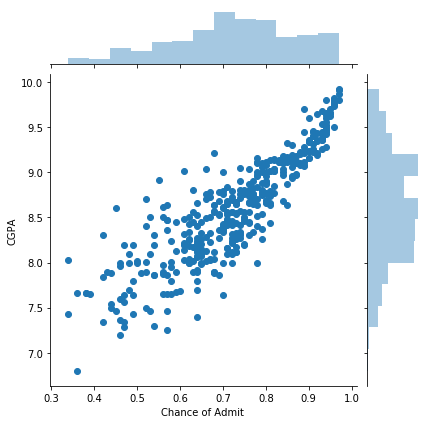

In [232]:
sns.jointplot(x='Chance of Admit ',y='CGPA',data=df,kind='scatter')

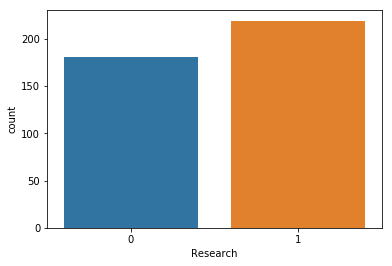

In [213]:
sns.countplot(df['Research'])

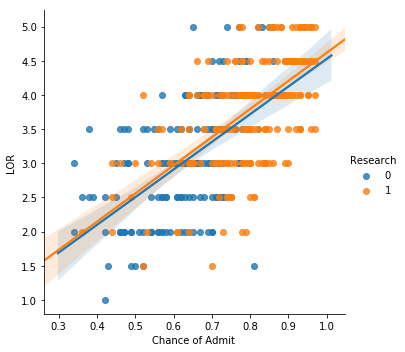

In [214]:
sns.lmplot(x='Chance of Admit ',y='LOR ',data=df,hue='Research')

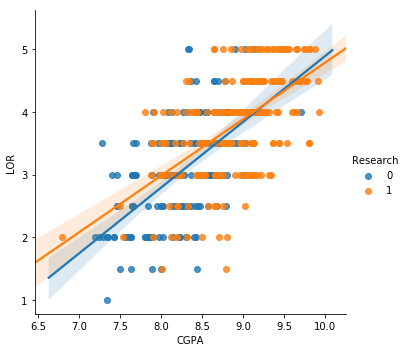

In [215]:
sns.lmplot(x='CGPA',y='LOR ',data=df,hue='Research')

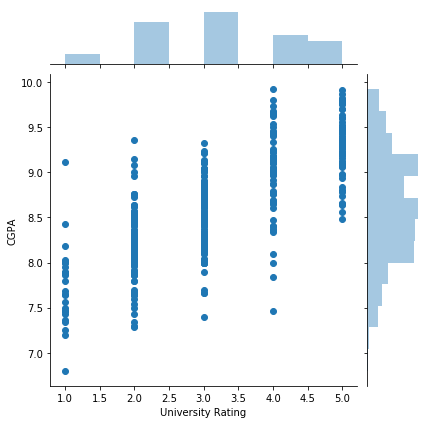

In [216]:
sns.jointplot(x='University Rating',y='CGPA',data=df,kind='scatter')

In [217]:
from sklearn.model_selection import train_test_split

df=df.drop(['Serial No.'], axis=1)

X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [219]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [220]:
predict = dtr.predict(X_test)

In [221]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

dtr_mse= mean_squared_error(y_test, predict)
dtr_rmse = np.sqrt(metrics.mean_squared_error(y_test, predict))

print('Decision Tree Regression RMSE: ', dtr_rmse)
print('Decision Tree Regression MSE: ', dtr_mse)

Decision Tree Regression RMSE:  0.09448544861511744
Decision Tree Regression MSE:  0.0089275


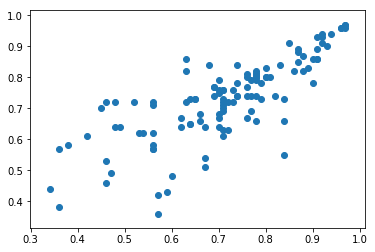

In [222]:
plt.scatter(predict,y_test)

In [223]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

  
rfe = RFE(RandomForestRegressor(n_estimators=50, random_state=42), n_features_to_select=3)

rfe.fit(X_train, y_train)

#create dataframe of feature and ranking. Top 3 have '1' in rfe.ranking_ array
rfe_features_rank = pd.DataFrame({'feature':X_train.columns, 'score':rfe.ranking_})
#compose list of highest ranked features
top_three_features = rfe_features_rank[rfe_features_rank['score'] == 1]['feature'].values
print('Top three features: ', top_three_features)

Top three features:  ['GRE Score' 'TOEFL Score' 'CGPA']


'GRE Score'

In [225]:
top3_df = df[[top_three_features[0],top_three_features[1], top_three_features[2], 'Chance of Admit ']]

In [226]:
X = top3_df.drop('Chance of Admit ', axis=1)
y = top3_df['Chance of Admit ']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
dtr.fit(X_train, y_train)
predict = dtr.predict(X_test)

In [228]:
dtr_mse= mean_squared_error(y_test, predict)
dtr_rmse = np.sqrt(metrics.mean_squared_error(y_test, predict))

print('Decision Tree Regression with only top three features RMSE: ', dtr_rmse)
print('Decision Tree Regression with only top three features MSE: ', dtr_mse)

Decision Tree Regression with only top three features RMSE:  0.10637198879404296
Decision Tree Regression with only top three features MSE:  0.011315


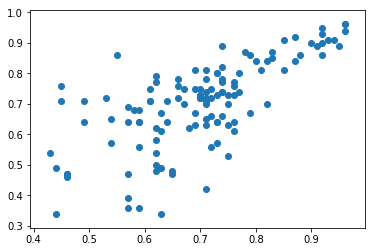

In [229]:
plt.scatter(predict,y_test)